# Module 5 - Section 1: EDA Fundamentals

## Live Demonstrations for Slides 1-6

This notebook contains the demonstrations for Section 1 of Module 5, covering:
- Demo 1: Complete EDA Workflow (After Slide 4)
- Demo 2: Setting Up Visualization Templates (After Slide 6)

### Learning Objectives:
- Understand the systematic workflow for exploring any dataset
- Learn to create reusable templates for consistent analysis
- Build foundation skills for exploratory data analysis

---

## Setup and Imports

Run this cell first to import all necessary libraries and configure the environment.

In [46]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Print confirmation
print("✅ Libraries loaded successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

✅ Libraries loaded successfully!
Pandas version: 2.2.3
NumPy version: 2.1.3
Matplotlib version: 3.10.6
Seaborn version: 0.13.2


## Load Dataset

We'll use the Tips dataset - a classic dataset for teaching EDA concepts. It contains information about restaurant bills, tips, and customer characteristics.

In [47]:
# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

print("✅ Tips dataset loaded successfully!")
print(f"Dataset shape: {tips.shape}")
print(f"Columns: {', '.join(tips.columns)}")

✅ Tips dataset loaded successfully!
Dataset shape: (244, 7)
Columns: total_bill, tip, sex, smoker, day, time, size


---

# Demo 1: Complete EDA Workflow

## 🎯 Use after Slide 4: The EDA Workflow

**Key Concept**: Systematic exploration beats random investigation. Follow this structured approach for every dataset.

### The 5-Step Workflow:
1. **First Look** - Shape, size, preview
2. **Data Types & Structure** - Understanding what we have
3. **Basic Statistics** - Central tendencies and spread
4. **Data Quality** - Missing values, duplicates
5. **Quick Visualizations** - Initial patterns

In [48]:
print("="*70)
print("COMPLETE EDA WORKFLOW DEMONSTRATION")
print("Following the systematic approach from Slide 4")
print("="*70)

# ============================================================
# STEP 1: FIRST LOOK
# ============================================================
print("\n" + "="*50)
print("📊 STEP 1: FIRST LOOK AT THE DATA")
print("="*50)

print(f"\nDataset Dimensions: {tips.shape[0]} rows × {tips.shape[1]} columns")
print(f"Memory Usage: {tips.memory_usage(deep=True).sum() / 1024:.2f} KB")

print("\nFirst 5 rows:")
print("-"*50)
print(tips.head())

print("\nLast 3 rows:")
print("-"*50)
print(tips.tail(3))

print("\n💡 Insight: We can see this is restaurant data with bill amounts, tips, and customer info")

COMPLETE EDA WORKFLOW DEMONSTRATION
Following the systematic approach from Slide 4

📊 STEP 1: FIRST LOOK AT THE DATA

Dataset Dimensions: 244 rows × 7 columns
Memory Usage: 7.80 KB

First 5 rows:
--------------------------------------------------
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Last 3 rows:
--------------------------------------------------
     total_bill   tip     sex smoker   day    time  size
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

💡 Insight: We can see this is restaurant data with bill amounts, tips, and customer info


In [49]:
# ============================================================
# STEP 2: DATA TYPES & STRUCTURE
# ============================================================
print("="*50)
print("📊 STEP 2: DATA TYPES & STRUCTURE")
print("="*50)

print("\nColumn Information:")
print("-"*50)
print(tips.info())

print("\nData Types Summary:")
print("-"*50)
print(tips.dtypes.value_counts())

print("\nCategorical Variables:")
categorical_cols = tips.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"  {', '.join(categorical_cols)}")

print("\nNumeric Variables:")
numeric_cols = tips.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"  {', '.join(numeric_cols)}")

print("\n💡 Insight: Mix of numeric (bills, tips) and categorical (day, time, etc.) data")

📊 STEP 2: DATA TYPES & STRUCTURE

Column Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Data Types Summary:
--------------------------------------------------
float64     2
category    1
category    1
category    1
category    1
int64       1
Name: count, dtype: int64

Categorical Variables:
  sex, smoker, day, time

Numeric Variables:
  total_bill, tip, size

💡 Insight: Mix of numeric (bills, tips) and categorical (day, time, e

In [50]:
# ============================================================
# STEP 3: BASIC STATISTICS
# ============================================================
print("="*50)
print("📊 STEP 3: BASIC STATISTICAL SUMMARY")
print("="*50)

print("\nNumeric Variables Statistics:")
print("-"*50)
print(tips.describe().round(2))

print("\nCategorical Variables Summary:")
print("-"*50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(tips[col].value_counts())

print("\n💡 Insights:")
print("  - Average bill: $19.79, Average tip: $3.00")
print("  - Bills range from $3.07 to $50.81")
print("  - Most data from dinner time and weekends")

📊 STEP 3: BASIC STATISTICAL SUMMARY

Numeric Variables Statistics:
--------------------------------------------------
       total_bill     tip    size
count      244.00  244.00  244.00
mean        19.79    3.00    2.57
std          8.90    1.38    0.95
min          3.07    1.00    1.00
25%         13.35    2.00    2.00
50%         17.80    2.90    2.00
75%         24.13    3.56    3.00
max         50.81   10.00    6.00

Categorical Variables Summary:
--------------------------------------------------

sex:
sex
Male      157
Female     87
Name: count, dtype: int64

smoker:
smoker
No     151
Yes     93
Name: count, dtype: int64

day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

time:
time
Dinner    176
Lunch      68
Name: count, dtype: int64

💡 Insights:
  - Average bill: $19.79, Average tip: $3.00
  - Bills range from $3.07 to $50.81
  - Most data from dinner time and weekends


In [51]:
# ============================================================
# STEP 4: DATA QUALITY CHECK
# ============================================================
print("="*50)
print("📊 STEP 4: DATA QUALITY ASSESSMENT")
print("="*50)

print("\nMissing Values:")
print("-"*30)
missing = tips.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values found!")
else:
    print(missing[missing > 0])

print("\nDuplicate Rows:")
print("-"*30)
duplicates = tips.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("⚠️ Duplicates found - investigation needed!")
else:
    print("✅ No duplicate rows found!")

print("\nData Consistency Checks:")
print("-"*30)
print(f"Negative tips: {(tips['tip'] < 0).sum()}")
print(f"Tips > Total Bill: {(tips['tip'] > tips['total_bill']).sum()}")
print(f"Zero party size: {(tips['size'] == 0).sum()}")

print("\n💡 Insight: Data quality is excellent - no missing values or obvious errors!")

📊 STEP 4: DATA QUALITY ASSESSMENT

Missing Values:
------------------------------
✅ No missing values found!

Duplicate Rows:
------------------------------
Number of duplicate rows: 1
⚠️ Duplicates found - investigation needed!

Data Consistency Checks:
------------------------------
Negative tips: 0
Tips > Total Bill: 0
Zero party size: 0

💡 Insight: Data quality is excellent - no missing values or obvious errors!


📊 STEP 5: INITIAL VISUALIZATIONS

Creating 4 key visualizations to understand the data...



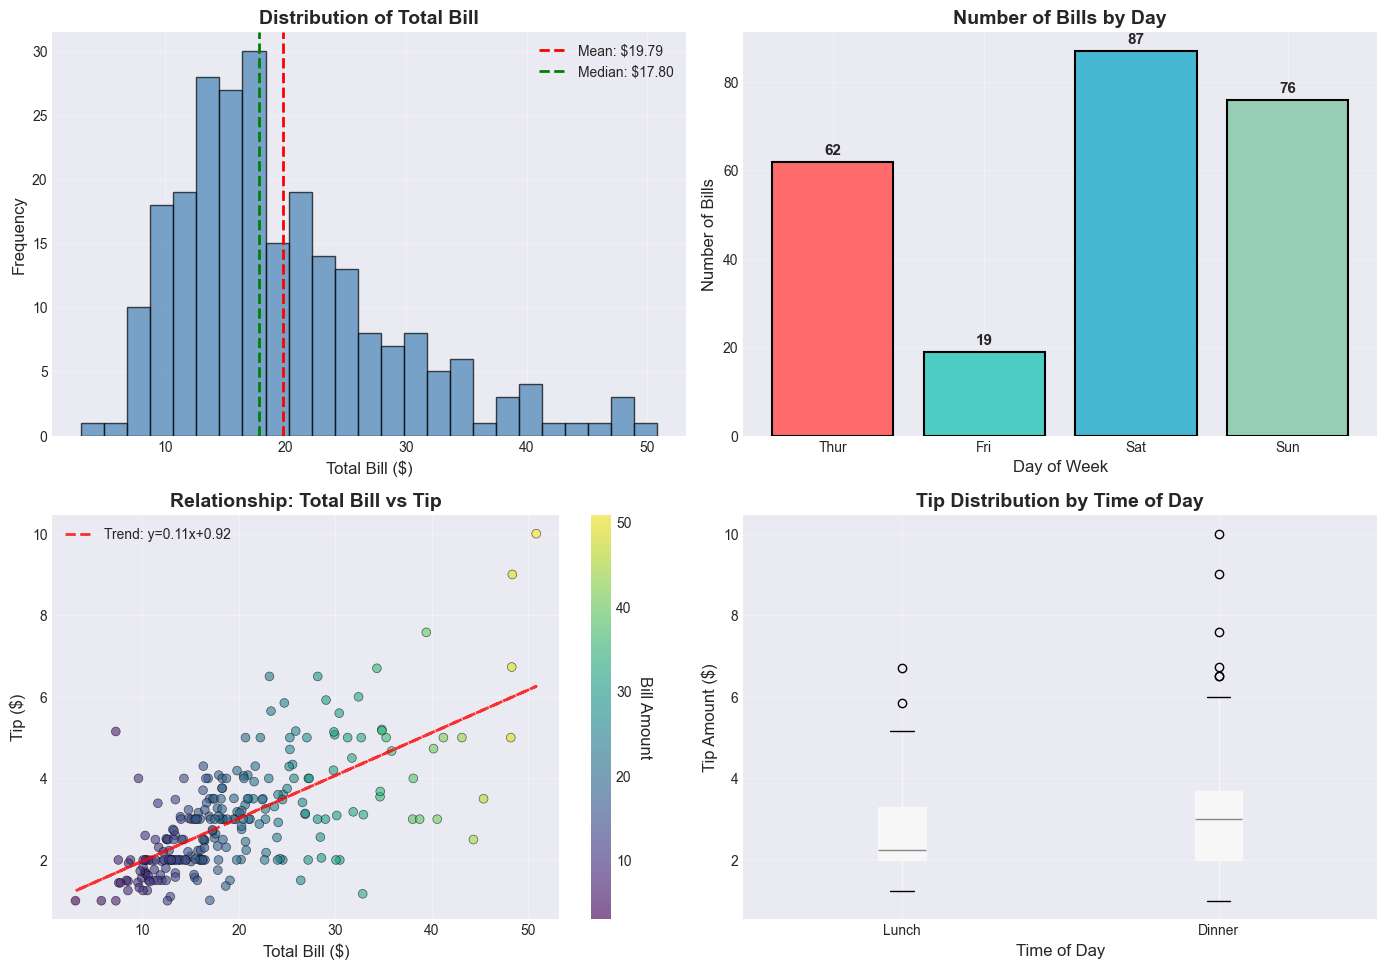


💡 Key Insights from Visualizations:
  1. Total bills are right-skewed (more small bills, few large ones)
  2. Saturday has the most customers, Thursday the least
  3. Strong positive correlation between bill size and tip
  4. Dinner tips show more variation than lunch tips


In [52]:
# ============================================================
# STEP 5: QUICK VISUALIZATIONS
# ============================================================
print("="*50)
print("📊 STEP 5: INITIAL VISUALIZATIONS")
print("="*50)
print("\nCreating 4 key visualizations to understand the data...\n")

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Total Bill
axes[0, 0].hist(tips['total_bill'], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(tips['total_bill'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${tips["total_bill"].mean():.2f}')
axes[0, 0].axvline(tips['total_bill'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${tips["total_bill"].median():.2f}')
axes[0, 0].set_xlabel('Total Bill ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Total Bill', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Bills by Day of Week
day_order = ['Thur', 'Fri', 'Sat', 'Sun']
day_counts = tips['day'].value_counts().reindex(day_order)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = axes[0, 1].bar(day_order, day_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Bills')
axes[0, 1].set_title('Number of Bills by Day', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, value in zip(bars, day_counts.values):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(value)}', ha='center', va='bottom', fontweight='bold')

# 3. Relationship between Bill and Tip
scatter = axes[1, 0].scatter(tips['total_bill'], tips['tip'], 
                             alpha=0.6, s=40, c=tips['total_bill'], 
                             cmap='viridis', edgecolors='black', linewidth=0.5)

# Add regression line
z = np.polyfit(tips['total_bill'], tips['tip'], 1)
p = np.poly1d(z)
axes[1, 0].plot(tips['total_bill'], p(tips['total_bill']), "r--", 
                alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

axes[1, 0].set_xlabel('Total Bill ($)')
axes[1, 0].set_ylabel('Tip ($)')
axes[1, 0].set_title('Relationship: Total Bill vs Tip', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label('Bill Amount', rotation=270, labelpad=15)

# 4. Tips by Time of Day (Box Plot)
bp = tips.boxplot(column='tip', by='time', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_xlabel('Time of Day')
axes[1, 1].set_ylabel('Tip Amount ($)')
axes[1, 1].set_title('Tip Distribution by Time of Day', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove the default title

# Color the box plots
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp.artists, colors):
    patch.set_facecolor(color)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights from Visualizations:")
print("  1. Total bills are right-skewed (more small bills, few large ones)")
print("  2. Saturday has the most customers, Thursday the least")
print("  3. Strong positive correlation between bill size and tip")
print("  4. Dinner tips show more variation than lunch tips")

## Summary: The EDA Workflow

We've just completed a systematic exploration following these steps:

1. ✅ **First Look** - Understood the dataset's size and structure
2. ✅ **Data Types** - Identified numeric vs categorical variables
3. ✅ **Statistics** - Calculated summary statistics
4. ✅ **Quality Check** - Verified data integrity
5. ✅ **Visualizations** - Created initial plots to see patterns

### 🎯 Remember: This workflow should be your starting point for EVERY dataset!

---

# Demo 2: Setting Up Reusable Visualization Templates

## 🎯 Use after Slide 6: Setting Up Your Visualization Toolkit

**Key Concept**: Create templates once, use them forever. Consistency and efficiency are key to professional analysis.

### What We'll Create:
1. Custom style configuration
2. Color palette for brand consistency
3. Template functions for common analyses
4. Quick EDA function for any numeric variable

In [53]:
print("="*70)
print("CREATING REUSABLE VISUALIZATION TEMPLATES")
print("Build once, use everywhere!")
print("="*70)

CREATING REUSABLE VISUALIZATION TEMPLATES
Build once, use everywhere!


In [54]:
# ============================================================
# PART 1: CUSTOM STYLE CONFIGURATION
# ============================================================
print("\n📊 PART 1: Creating Custom Style Dictionary")
print("-"*50)

# Define custom style parameters
custom_style = {
    'figure.figsize': (12, 6),
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'font.family': 'sans-serif',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.3,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white'
}

# Function to apply custom style
def apply_custom_style():
    """Apply our custom visualization style"""
    for key, value in custom_style.items():
        plt.rcParams[key] = value
    print("✅ Custom style applied successfully!")
    print("   - Cleaner look (no top/right spines)")
    print("   - Consistent sizing and fonts")
    print("   - Professional grid appearance")

# Apply the style
apply_custom_style()


📊 PART 1: Creating Custom Style Dictionary
--------------------------------------------------
✅ Custom style applied successfully!
   - Cleaner look (no top/right spines)
   - Consistent sizing and fonts
   - Professional grid appearance



📊 PART 2: Setting Up Color Palettes
--------------------------------------------------


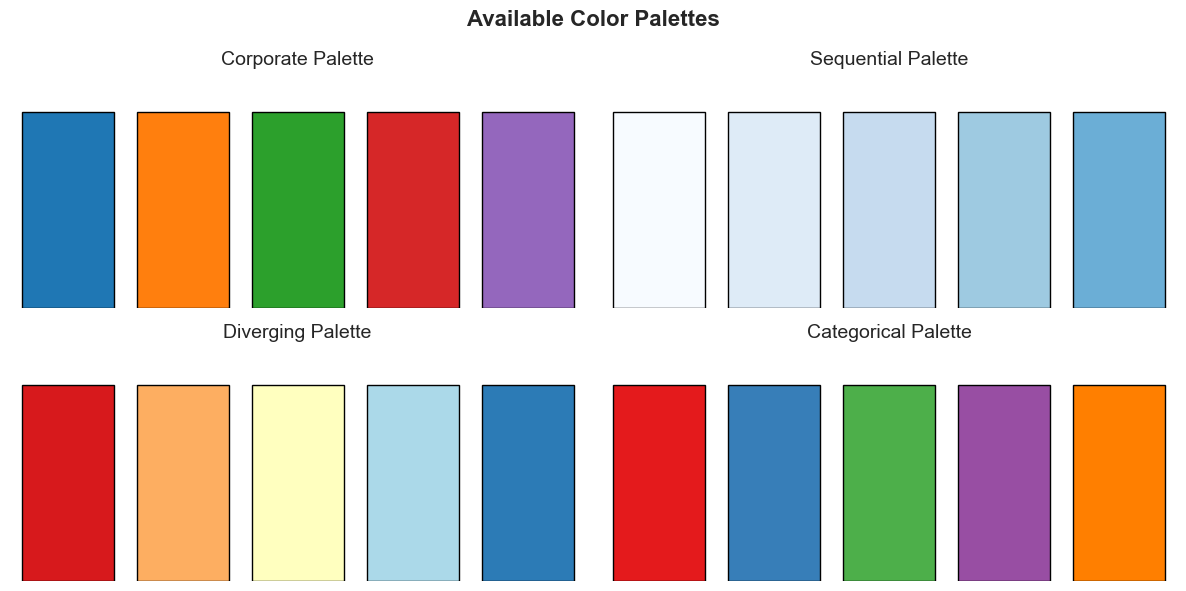


✅ Color palettes ready for use!
   Use these for consistent, professional visualizations


In [55]:
# ============================================================
# PART 2: CORPORATE COLOR PALETTE
# ============================================================
print("\n📊 PART 2: Setting Up Color Palettes")
print("-"*50)

# Define multiple color palettes for different uses
color_palettes = {
    'corporate': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
    'sequential': ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6'],
    'diverging': ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6'],
    'categorical': ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
}

# Set default palette
sns.set_palette(color_palettes['corporate'])

# Visualize the palettes
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Available Color Palettes', fontsize=16, fontweight='bold')

for idx, (name, colors) in enumerate(color_palettes.items()):
    ax = axes[idx // 2, idx % 2]
    for i, color in enumerate(colors):
        ax.bar(i, 1, color=color, edgecolor='black', linewidth=1)
    ax.set_title(f'{name.capitalize()} Palette')
    ax.set_xlim(-0.5, len(colors) - 0.5)
    ax.set_ylim(0, 1.2)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

print("\n✅ Color palettes ready for use!")
print("   Use these for consistent, professional visualizations")

In [56]:
# ============================================================
# PART 3: TEMPLATE FUNCTION FOR NUMERIC ANALYSIS
# ============================================================
print("\n📊 PART 3: Creating Reusable Analysis Template")
print("-"*50)

def quick_numeric_eda(df, column, title_prefix="Analysis of", color_scheme='corporate'):
    """
    Complete EDA for a numeric variable with one function call.
    
    Parameters:
    -----------
    df : DataFrame
        The dataset
    column : str
        Name of numeric column to analyze
    title_prefix : str
        Prefix for plot titles
    color_scheme : str
        Which color palette to use
    
    Returns:
    --------
    fig : matplotlib figure
        The complete analysis plot
    stats : dict
        Statistical summary
    """
    
    # Get the data
    data = df[column].dropna()
    
    # Calculate statistics
    stats_dict = {
        'count': len(data),
        'mean': data.mean(),
        'median': data.median(),
        'std': data.std(),
        'min': data.min(),
        'max': data.max(),
        'skewness': data.skew(),
        'kurtosis': data.kurtosis()
    }
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle(f'{title_prefix}: {column}', fontsize=16, fontweight='bold', y=1.05)
    
    # Use selected color scheme
    colors = color_palettes[color_scheme]
    
    # 1. Histogram with KDE
    axes[0].hist(data, bins=30, density=True, alpha=0.7, 
                 color=colors[0], edgecolor='black', linewidth=0.5)
    data.plot(kind='kde', ax=axes[0], color=colors[1], linewidth=2)
    axes[0].axvline(data.mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: {data.mean():.2f}')
    axes[0].axvline(data.median(), color='green', linestyle='--', 
                    linewidth=2, label=f'Median: {data.median():.2f}')
    axes[0].set_title('Distribution with KDE')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Density')
    axes[0].legend(fontsize=9)
    axes[0].grid(True, alpha=0.3)
    
    # 2. Box Plot
    bp = axes[1].boxplot(data, vert=True, patch_artist=True, widths=0.7)
    bp['boxes'][0].set_facecolor(colors[2])
    bp['boxes'][0].set_alpha(0.7)
    axes[1].set_title('Box Plot')
    axes[1].set_ylabel(column)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xticklabels([column])
    
    # Add outlier count
    Q1, Q3 = data.quantile(0.25), data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)).sum()
    axes[1].text(1, axes[1].get_ylim()[1] * 0.95, 
                 f'Outliers: {outliers}', 
                 horizontalalignment='center',
                 fontsize=10, fontweight='bold')
    
    # 3. Q-Q Plot
    stats.probplot(data, dist="norm", plot=axes[2])
    axes[2].set_title('Q-Q Plot (Normality Test)')
    axes[2].grid(True, alpha=0.3)
    
    # 4. Statistical Summary Table
    axes[3].axis('tight')
    axes[3].axis('off')
    
    # Create table data
    table_data = [
        ['Statistic', 'Value'],
        ['Count', f'{stats_dict["count"]:,}'],
        ['Mean', f'{stats_dict["mean"]:.2f}'],
        ['Median', f'{stats_dict["median"]:.2f}'],
        ['Std Dev', f'{stats_dict["std"]:.2f}'],
        ['Min', f'{stats_dict["min"]:.2f}'],
        ['Max', f'{stats_dict["max"]:.2f}'],
        ['Skewness', f'{stats_dict["skewness"]:.3f}'],
        ['Kurtosis', f'{stats_dict["kurtosis"]:.3f}']
    ]
    
    table = axes[3].table(cellText=table_data, 
                          cellLoc='left',
                          loc='center',
                          colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    
    # Style the header row
    for i in range(2):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Alternate row colors
    for i in range(1, len(table_data)):
        for j in range(2):
            if i % 2 == 0:
                table[(i, j)].set_facecolor('#f0f0f0')
    
    axes[3].set_title('Statistical Summary')
    
    plt.tight_layout()
    
    return fig, stats_dict

print("✅ Template function created!")
print("   This function provides complete numeric analysis with one line of code")


📊 PART 3: Creating Reusable Analysis Template
--------------------------------------------------
✅ Template function created!
   This function provides complete numeric analysis with one line of code



📊 DEMONSTRATION: Using the Template Function
Analyzing 'total_bill' with one function call...



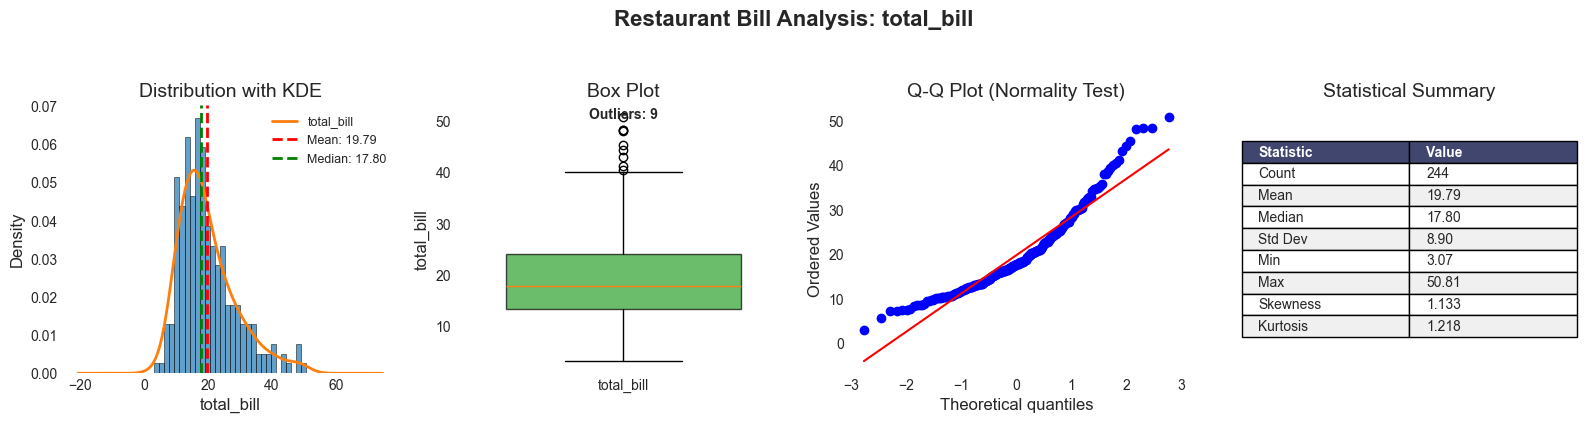


💡 Insights from the template analysis:
  - Skewness = 1.133 → Right-skewed distribution
  - Mean (19.79) > Median (17.80) → Confirms right skew
  - Q-Q plot shows deviation from normal at extremes
  - Several outliers on the high end (expensive meals)


In [57]:
# ============================================================
# DEMONSTRATE THE TEMPLATE FUNCTION
# ============================================================
print("\n📊 DEMONSTRATION: Using the Template Function")
print("="*50)
print("Analyzing 'total_bill' with one function call...\n")

# Use the template function
fig, stats_dict = quick_numeric_eda(tips, 'total_bill', 
                               title_prefix='Restaurant Bill Analysis',
                               color_scheme='corporate')
plt.show()

# Interpretation
print("\n💡 Insights from the template analysis:")
print(f"  - Skewness = {stats_dict['skewness']:.3f} → Right-skewed distribution")
print(f"  - Mean ({stats_dict['mean']:.2f}) > Median ({stats_dict['median']:.2f}) → Confirms right skew")
print(f"  - Q-Q plot shows deviation from normal at extremes")
print(f"  - Several outliers on the high end (expensive meals)")


Testing template with 'tip' variable...



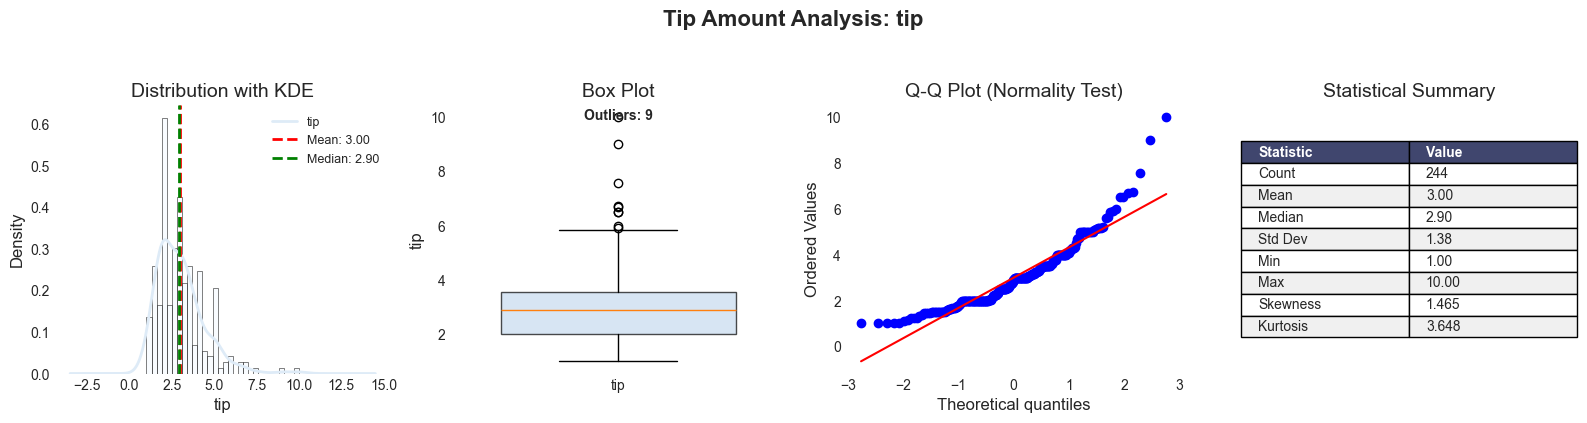


✅ Same function, different variable - instant analysis!


In [58]:
# Test the template with another variable
print("\n" + "="*50)
print("Testing template with 'tip' variable...\n")

fig2, stats2 = quick_numeric_eda(tips, 'tip', 
                                 title_prefix='Tip Amount Analysis',
                                 color_scheme='sequential')
plt.show()

print("\n✅ Same function, different variable - instant analysis!")


📊 BONUS: Template for Categorical Variables
Testing categorical template with 'day' variable...



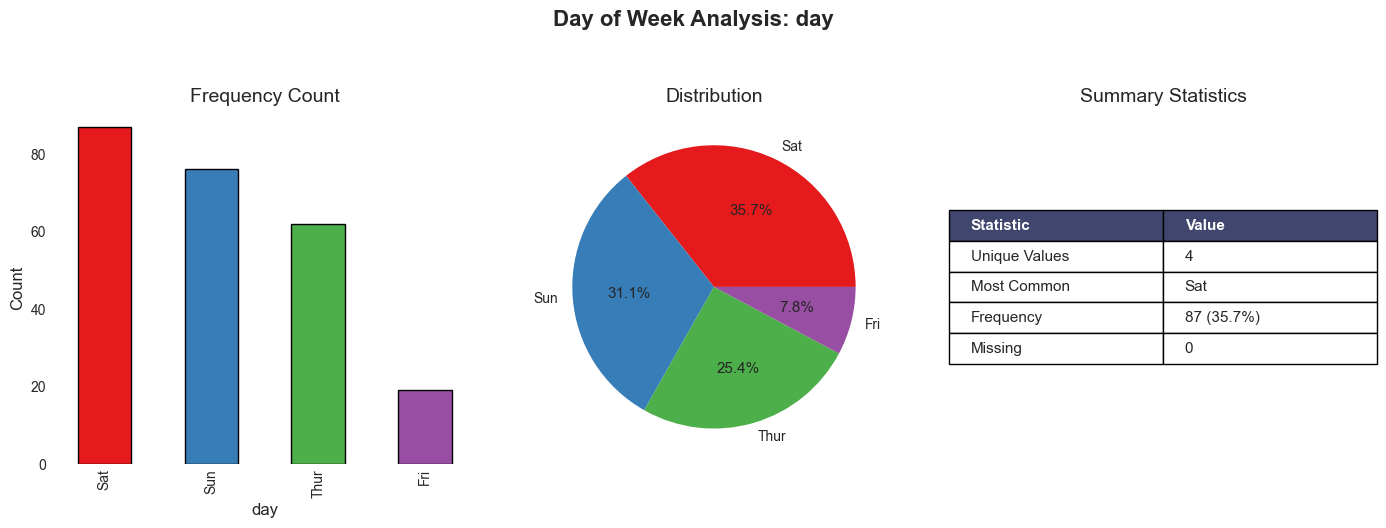


✅ Now you have templates for both numeric and categorical variables!


In [59]:
# ============================================================
# BONUS: CATEGORICAL VARIABLE TEMPLATE
# ============================================================
print("\n📊 BONUS: Template for Categorical Variables")
print("="*50)

def quick_categorical_eda(df, column, title_prefix="Analysis of", top_n=10):
    """
    Quick EDA for categorical variables.
    """
    
    # Get value counts
    value_counts = df[column].value_counts()
    
    # Create figure
    fig, axes = plt.subplots(1, 3, figsize=(14, 5))
    fig.suptitle(f'{title_prefix}: {column}', fontsize=16, fontweight='bold', y=1.05)
    
    # 1. Bar plot
    value_counts.head(top_n).plot(kind='bar', ax=axes[0], 
                                  color=color_palettes['categorical'], 
                                  edgecolor='black')
    axes[0].set_title('Frequency Count')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # 2. Pie chart (if few categories)
    if len(value_counts) <= 5:
        value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                         colors=color_palettes['categorical'][:len(value_counts)])
        axes[1].set_title('Distribution')
        axes[1].set_ylabel('')
    else:
        axes[1].text(0.5, 0.5, f'Too many categories\nfor pie chart\n({len(value_counts)} unique values)',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[1].transAxes, fontsize=12)
        axes[1].set_title('Distribution')
        axes[1].axis('off')
    
    # 3. Summary statistics
    axes[2].axis('tight')
    axes[2].axis('off')
    
    summary_data = [
        ['Statistic', 'Value'],
        ['Unique Values', str(df[column].nunique())],
        ['Most Common', str(value_counts.index[0])],
        ['Frequency', f'{value_counts.iloc[0]} ({value_counts.iloc[0]/len(df)*100:.1f}%)'],
        ['Missing', str(df[column].isnull().sum())]
    ]
    
    table = axes[2].table(cellText=summary_data,
                         cellLoc='left',
                         loc='center',
                         colWidths=[0.5, 0.5])
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)
    
    # Style the header
    for i in range(2):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    axes[2].set_title('Summary Statistics')
    
    plt.tight_layout()
    return fig

# Demonstrate categorical template
print("Testing categorical template with 'day' variable...\n")
fig3 = quick_categorical_eda(tips, 'day', title_prefix='Day of Week Analysis')
plt.show()

print("\n✅ Now you have templates for both numeric and categorical variables!")

## Summary: Reusable Templates

### What We've Created:

1. **Custom Style Configuration**
   - Clean, professional appearance
   - Consistent across all plots
   - Easy to modify for different needs

2. **Color Palettes**
   - Corporate colors for business presentations
   - Sequential for continuous data
   - Diverging for positive/negative
   - Categorical for distinct groups

3. **Template Functions**
   - `quick_numeric_eda()` - Complete analysis for numeric variables
   - `quick_categorical_eda()` - Complete analysis for categorical variables
   - One line of code = full analysis!

### 💡 Pro Tips:
- Save these functions in a `.py` file and import them
- Customize colors to match your organization's brand
- Add more specialized templates as needed
- Version control your templates for team consistency

---

# Practice Exercises

Now try these exercises to reinforce your learning:

In [60]:
# EXERCISE 1: Apply the workflow to a different dataset
# Load the iris dataset and perform the 5-step EDA workflow

# Your code here:
iris = sns.load_dataset('iris')
# Continue with the 5 steps...

In [61]:
# EXERCISE 2: Create your own template function
# Make a function that compares a numeric variable across groups

def compare_groups(df, numeric_col, group_col):
    """
    Compare a numeric variable across different groups.
    
    Your task: Create visualizations showing:
    1. Box plots for each group
    2. Mean values with error bars
    3. Statistical test for difference
    """
    # Your code here:
    pass